In [ ]:
# 필요한 라이브러리 가져오기
import tensorflow as tf # Tensorflow 불러오기
from tensorflow.keras import layers, models # API 제공 오픈소스 라이브러리
from tensorflow.keras.datasets import cifar10 # CIFAR-10 데이터셋 불러오기
from tensorflow.keras.utils import to_categorical # 범주형으로 변환하는 유틸리티 함수
from tensorflow.keras.preprocessing import image # 이미지 전처리 함수
import numpy as np # 수치 계산 라이브러리
from sklearn.metrics import classification_report, confusion_matrix # 성능 분류 보고서, 혼동 행렬 지표
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import seaborn as sns # 데이터 시각화 라이브러리

크로스 발리데이션 없는 코드
(실습때 사용하는 코드)

In [ ]:
# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 개와 고양이 이미지만 선택
class_indices = [3, 5]  # 개와 고양이 클래스에 해당하는 인덱스
train_indices = np.where(np.isin(y_train, class_indices))[0]  # 훈련 데이터에서 개와 고양이 이미지만 선택
test_indices = np.where(np.isin(y_test, class_indices))[0]  # 테스트 데이터에서 개와 고양이 이미지만 선택

x_train = x_train[train_indices]  # 훈련 데이터의 개와 고양이 이미지
y_train = y_train[train_indices]  # 훈련 데이터의 개와 고양이 이미지의 레이블
x_test = x_test[test_indices]  # 테스트 데이터의 개와 고양이 이미지
y_test = y_test[test_indices]  # 테스트 데이터의 개와 고양이 이미지의 레이블

# 데이터 전처리
x_train = x_train.astype('float32') / 255.0  # 훈련 데이터 정규화
x_test = x_test.astype('float32') / 255.0  # 테스트 데이터 정규화

# 개와 고양이에 해당하는 레이블을 이진 레이블로 변환
y_train = (y_train == 5).astype('float32')  # 개는 1, 고양이는 0으로 변환
y_test = (y_test == 5).astype('float32')  # 개는 1, 고양이는 0으로 변환

# CNN 모델 정의
model = models.Sequential() # 모델 생성
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # 합성곱 레이어
model.add(layers.MaxPooling2D((2, 2)))  # 최대 풀링 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 합성곱 레이어
model.add(layers.MaxPooling2D((2, 2)))  # 최대 풀링 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 합성곱 레이어
model.add(layers.Flatten())  # 1차원으로 펼치기
model.add(layers.Dense(64, activation='relu'))  # 밀집 레이어
model.add(layers.Dense(1, activation='sigmoid'))  # 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# 이미지 분류 함수 정의
def classify_im
age(image_path):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 이미지 분류 예측
    prediction = model.predict(img_array)
    predicted_class = np.round(prediction[0][0]).astype(int)
    predicted_label = '개' if predicted_class == 1 else '고양이'

    return predicted_label

170498071/170498071 [==============================] - 5s 0us/step
Epoch 1/10
157/157 [==============================] - 11s 63ms/step - loss: 0.6719 - accuracy: 0.5763 - val_loss: 0.6551 - val_accuracy: 0.5950
Epoch 2/10
157/157 [==============================] - 10s 64ms/step - loss: 0.6141 - accuracy: 0.6580 - val_loss: 0.5960 - val_accuracy: 0.6835
Epoch 3/10
157/157 [==============================] - 9s 56ms/step - loss: 0.5712 - accuracy: 0.6997 - val_loss: 0.5536 - val_accuracy: 0.7095
Epoch 4/10
157/157 [==============================] - 10s 62ms/step - loss: 0.5318 - accuracy: 0.7299 - val_loss: 0.5303 - val_accuracy: 0.7185
Epoch 5/10
157/157 [==============================] - 11s 69ms/step - loss: 0.5055 - accuracy: 0.7479 - val_loss: 0.5091 - val_accuracy: 0.7370
Epoch 6/10
157/157 [==============================] - 9s 60ms/step - loss: 0.4692 - accuracy: 0.7770 - val_loss: 0.5347 - val_accuracy: 0.7295
Epoch 7/10
157/157 [==============================] - 9s 60ms/step - lo

(크로스 발리데이션 있는 코드) - 정확성 높음, 수업시간에는 활용 X

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 개와 고양이 이미지만 선택
class_indices = [3, 5]  # 개와 고양이 클래스에 해당하는 인덱스
train_indices = np.where(np.isin(y_train, class_indices))[0]  # 훈련 데이터에서 개와 고양이 이미지만 선택
test_indices = np.where(np.isin(y_test, class_indices))[0]  # 테스트 데이터에서 개와 고양이 이미지만 선택

x_train = x_train[train_indices]  # 훈련 데이터의 개와 고양이 이미지
y_train = y_train[train_indices]  # 훈련 데이터의 개와 고양이 이미지의 레이블
x_test = x_test[test_indices]  # 테스트 데이터의 개와 고양이 이미지
y_test = y_test[test_indices]  # 테스트 데이터의 개와 고양이 이미지의 레이블

# 데이터 전처리
x_train = x_train.astype('float32') / 255.0  # 훈련 데이터 정규화
x_test = x_test.astype('float32') / 255.0  # 테스트 데이터 정규화

# 개와 고양이에 해당하는 레이블을 이진 레이블로 변환
y_train = (y_train == 5).astype('float32')  # 개는 1, 고양이는 0으로 변환
y_test = (y_test == 5).astype('float32')  # 개는 1, 고양이는 0으로 변환

# 모델 정의
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# 모델 컴파일
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 크로스 발리데이션 설정
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

# 크로스 발리데이션 실행
histories = []
for fold, (train_indices, val_indices) in enumerate(kfold.split(x_train, y_train)):
    print(f"Fold {fold+1}/{num_folds}")
    x_train_fold = x_train[train_indices]
    y_train_fold = y_train[train_indices]
    x_val_fold = x_train[val_indices]
    y_val_fold = y_train[val_indices]

    # 모델 훈련
    history = model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(x_val_fold, y_val_fold))
    histories.append(history)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 이미지 분류 함수 정의
def classify_image(image_path):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 이미지 분류 예측
    prediction = model.predict(img_array)
    predicted_class = np.round(prediction[0][0]).astype(int)
    predicted_label = 'dog' if predicted_class == 1 else 'cat'

    return predicted_label


Fold 1/5
Epoch 1/10
125/125 [==============================] - 12s 84ms/step - loss: 0.6752 - accuracy: 0.5673 - val_loss: 0.6542 - val_accuracy: 0.6130
Epoch 2/10
125/125 [==============================] - 10s 82ms/step - loss: 0.6292 - accuracy: 0.6438 - val_loss: 0.6243 - val_accuracy: 0.6460
Epoch 3/10
125/125 [==============================] - 10s 82ms/step - loss: 0.5800 - accuracy: 0.6905 - val_loss: 0.5782 - val_accuracy: 0.6970
Epoch 4/10
125/125 [==============================] - 11s 91ms/step - loss: 0.5434 - accuracy: 0.7271 - val_loss: 0.5620 - val_accuracy: 0.7065
Epoch 5/10
125/125 [==============================] - 11s 86ms/step - loss: 0.5194 - accuracy: 0.7452 - val_loss: 0.5471 - val_accuracy: 0.7280
Epoch 6/10
125/125 [==============================] - 10s 82ms/step - loss: 0.4914 - accuracy: 0.7628 - val_loss: 0.5531 - val_accuracy: 0.7225
Epoch 7/10
125/125 [==============================] - 11s 90ms/step - loss: 0.4720 - accuracy: 0.7739 - val_loss: 0.5304 - val_

이미지 경로를 복사하여 입력하세요: /content/1.jpg
1/1 [==============================] - 0s 27ms/step


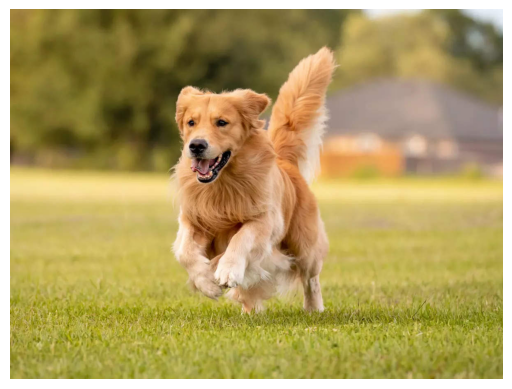

inserted image is cat.


In [ ]:
## 예측할 이미지 경로
image_path = input("이미지 경로를 복사하여 입력하세요: ")

# 이미지 분류 예측
predicted_label = classify_image(image_path)

# 이미지 출력
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# 예측 결과 출력
print(f'inserted image is {predicted_label}.')

63/63 [==============================] - 1s 12ms/step - loss: 1.4289 - accuracy: 0.7470
Test Loss: 1.4289360046386719
Test Accuracy: 0.746999979019165


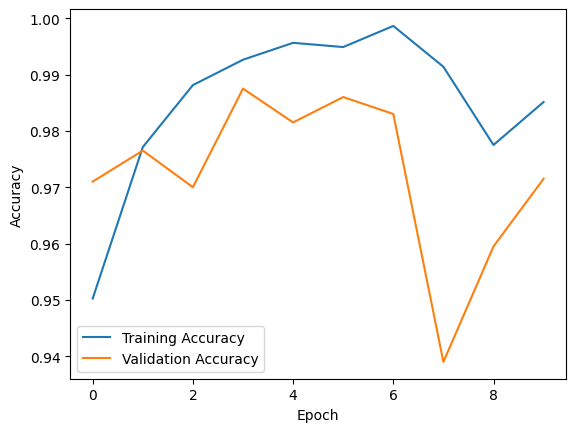

In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# 훈련 과정 도표 시각화
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

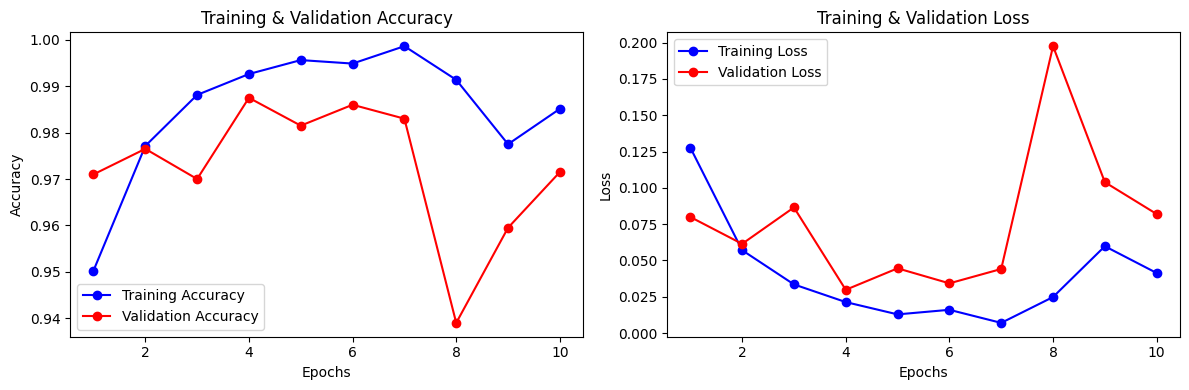

In [ ]:
# 데이터 저장
t_acc = history.history['accuracy'] # 훈련 데이터 정확도
v_acc = history.history['val_accuracy'] # 검증 데이터 정확도
t_loss = history.history['loss'] # 훈련 데이터 손실
v_loss = history.history['val_loss'] # 검증 데이터 손실
epochs = list(range(1, len(t_acc) + 1)) # x축 데이터 생성

# 훈련 및 검증 정확도 그래프
plt.figure(figsize=(12, 4)) # 그래프 사이즈
plt.subplot(1, 2, 1)
plt.plot(epochs, t_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, v_acc, 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 훈련 및 검증 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, t_loss, 'bo-', label='Training Loss')
plt.plot(epochs, v_loss, 'ro-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

63/63 [==============================] - 1s 12ms/step
분류 보고서:
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75      1000
         1.0       0.76      0.73      0.74      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



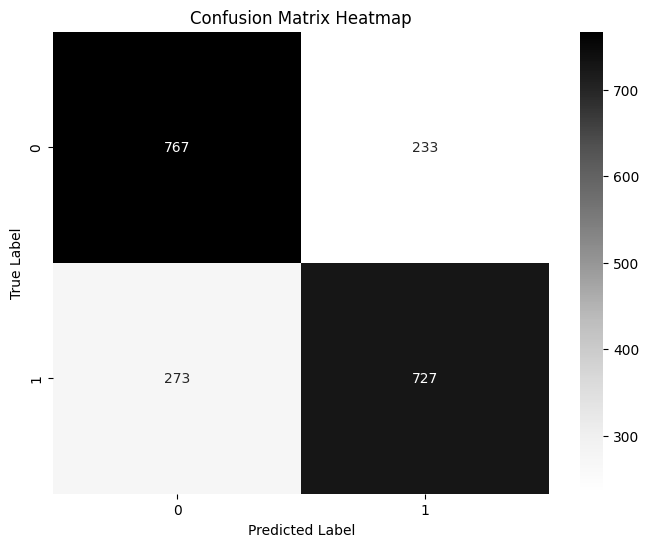

In [ ]:
# 예측된 확률값 생성
predicted_probabilities = model.predict(x_test) #->predict_classes 대신 쓴다
predicted_labels = (predicted_probabilities > 0.5).astype('int32')

# 분류 보고서
print("분류 보고서:")
print(classification_report(y_test, predicted_labels))

# 오차 행렬
cm = confusion_matrix(y_test, predicted_labels)

# 오차 행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()